In [29]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## OSEMN Pipeline
* ### O - Obtaining data
* ### S - Scrubbing data (cleaning)
* ### E - Exploring data (visualizing to find patterns)
* ### M - Modeling data
* ### N - iNterpreting data

In [30]:
# Loading dataset 
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

# Look at the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# Basic EDA (Exploratory Data Analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
# .T (transpose the table) --> maybe easier to inspect?
df.describe().T
# we can see that there are variables that have an invalid zero value
# Glucose, BloodPressure, SkinThickness, Insulin, BMI (at min)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [34]:
# Copy the original dataframe to new variable
df_new = df.copy()

# we will replace 0 with NaN
df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

# check the counts of NaN
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


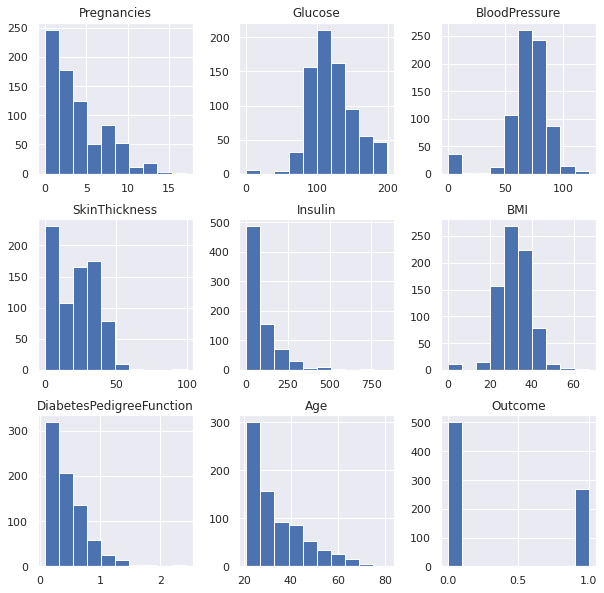

In [35]:
# But need to understand data distribution first before replacing NaN with methods
p = df.hist(figsize=(10,10))

In [36]:
# center at the middle -> mean
# skew -> median
# object with missing value filled if inplace = True
# Glucose, BloodPressure, SkinThickness, Insulin, BMI
df_new['Glucose'].fillna(df_new['Glucose'].mean(), inplace=True)
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(), inplace=True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].median(), inplace=True)
df_new['Insulin'].fillna(df_new['Insulin'].median(), inplace=True)
df_new['BMI'].fillna(df_new['BMI'].mean(), inplace=True)

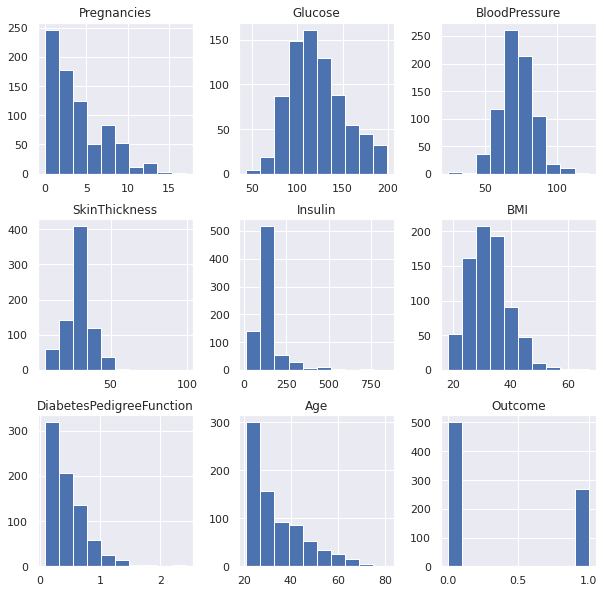

In [37]:
# Plotting after NaN removal
p = df_new.hist(figsize=(10,10))

In [38]:
df.shape

(768, 9)

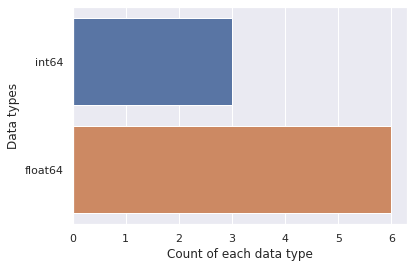

In [39]:
# data type analysis
# using seaborn
sns.countplot(y=df_new.dtypes.map(str), data=df_new)
plt.xlabel("Count of each data type")
plt.ylabel("Data types")
plt.show()

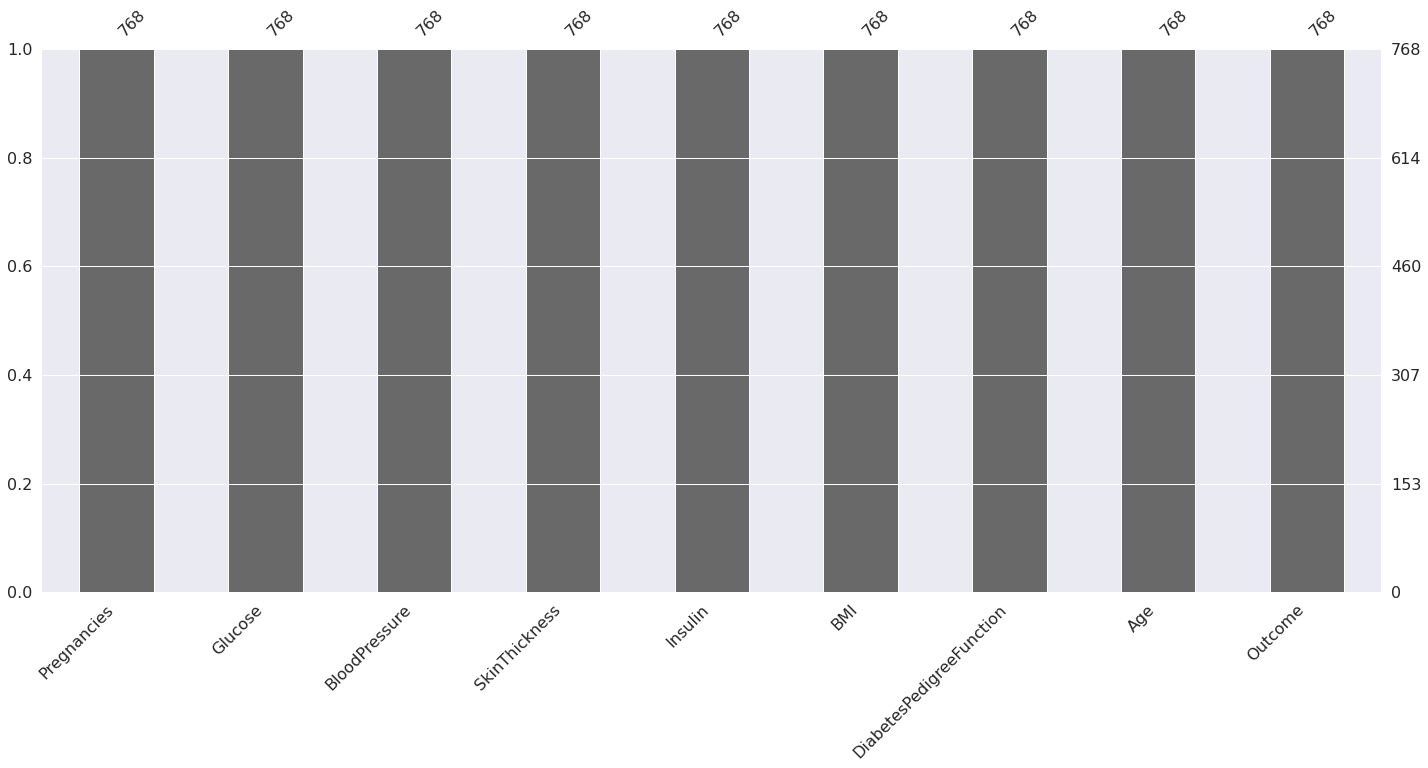

In [40]:
# null count analysis
import missingno as msno
pmis = msno.bar(df_new)

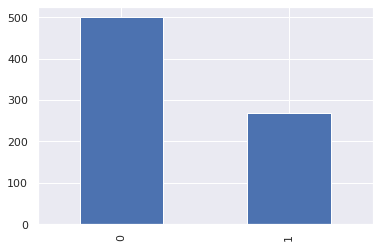

In [41]:
# checking bias in number of diabetic patients
p = df.Outcome.value_counts().plot(kind='bar')
# 0 = non-diabetic patients
# 1 = diabetic patients
# 0 is almost 2 times higher than 1

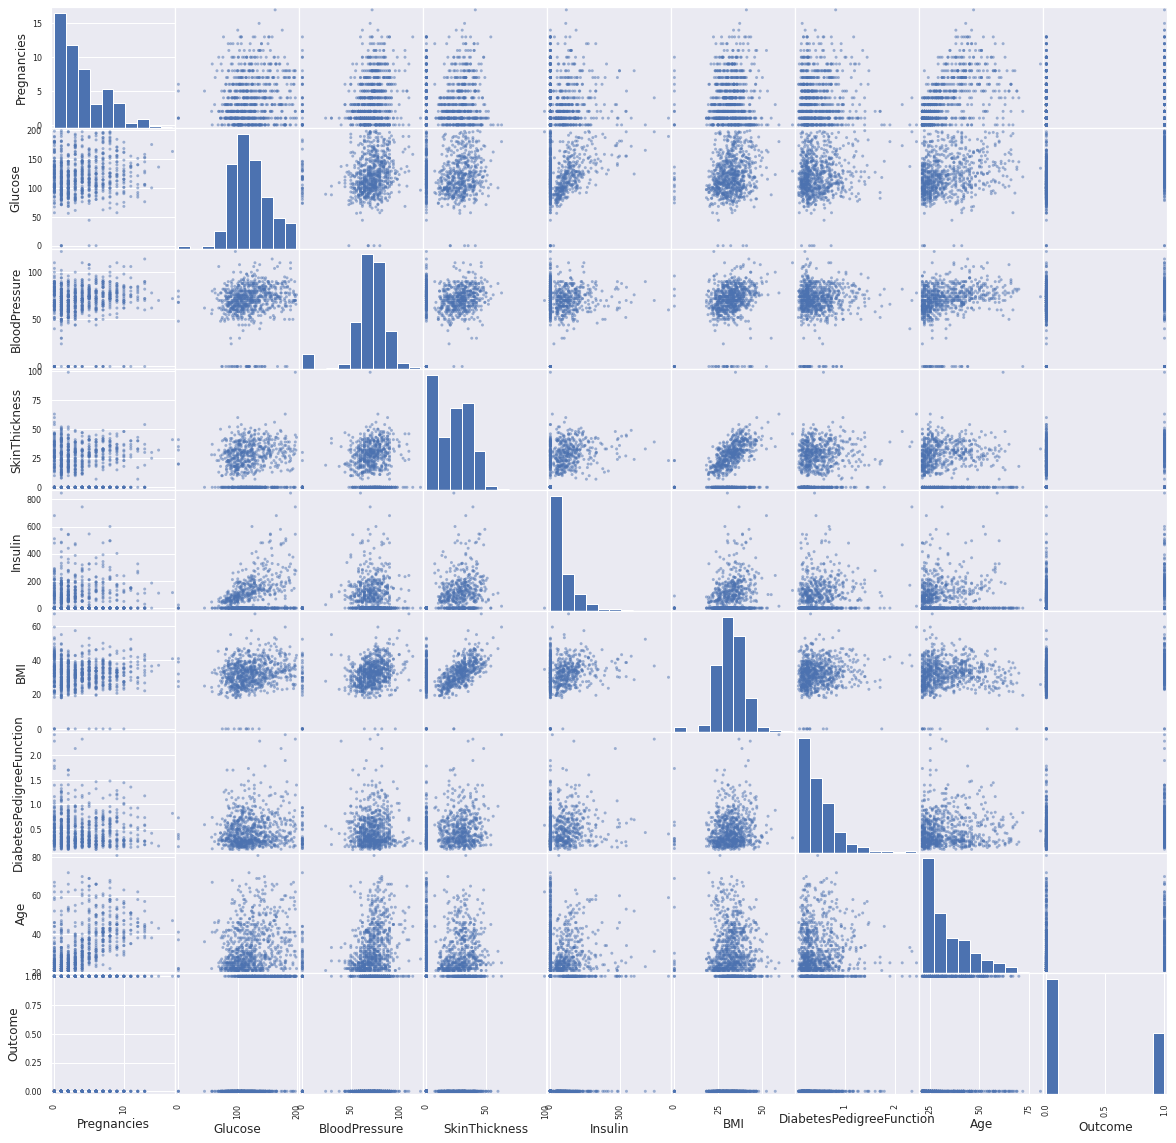

In [42]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df, figsize=(20,20))

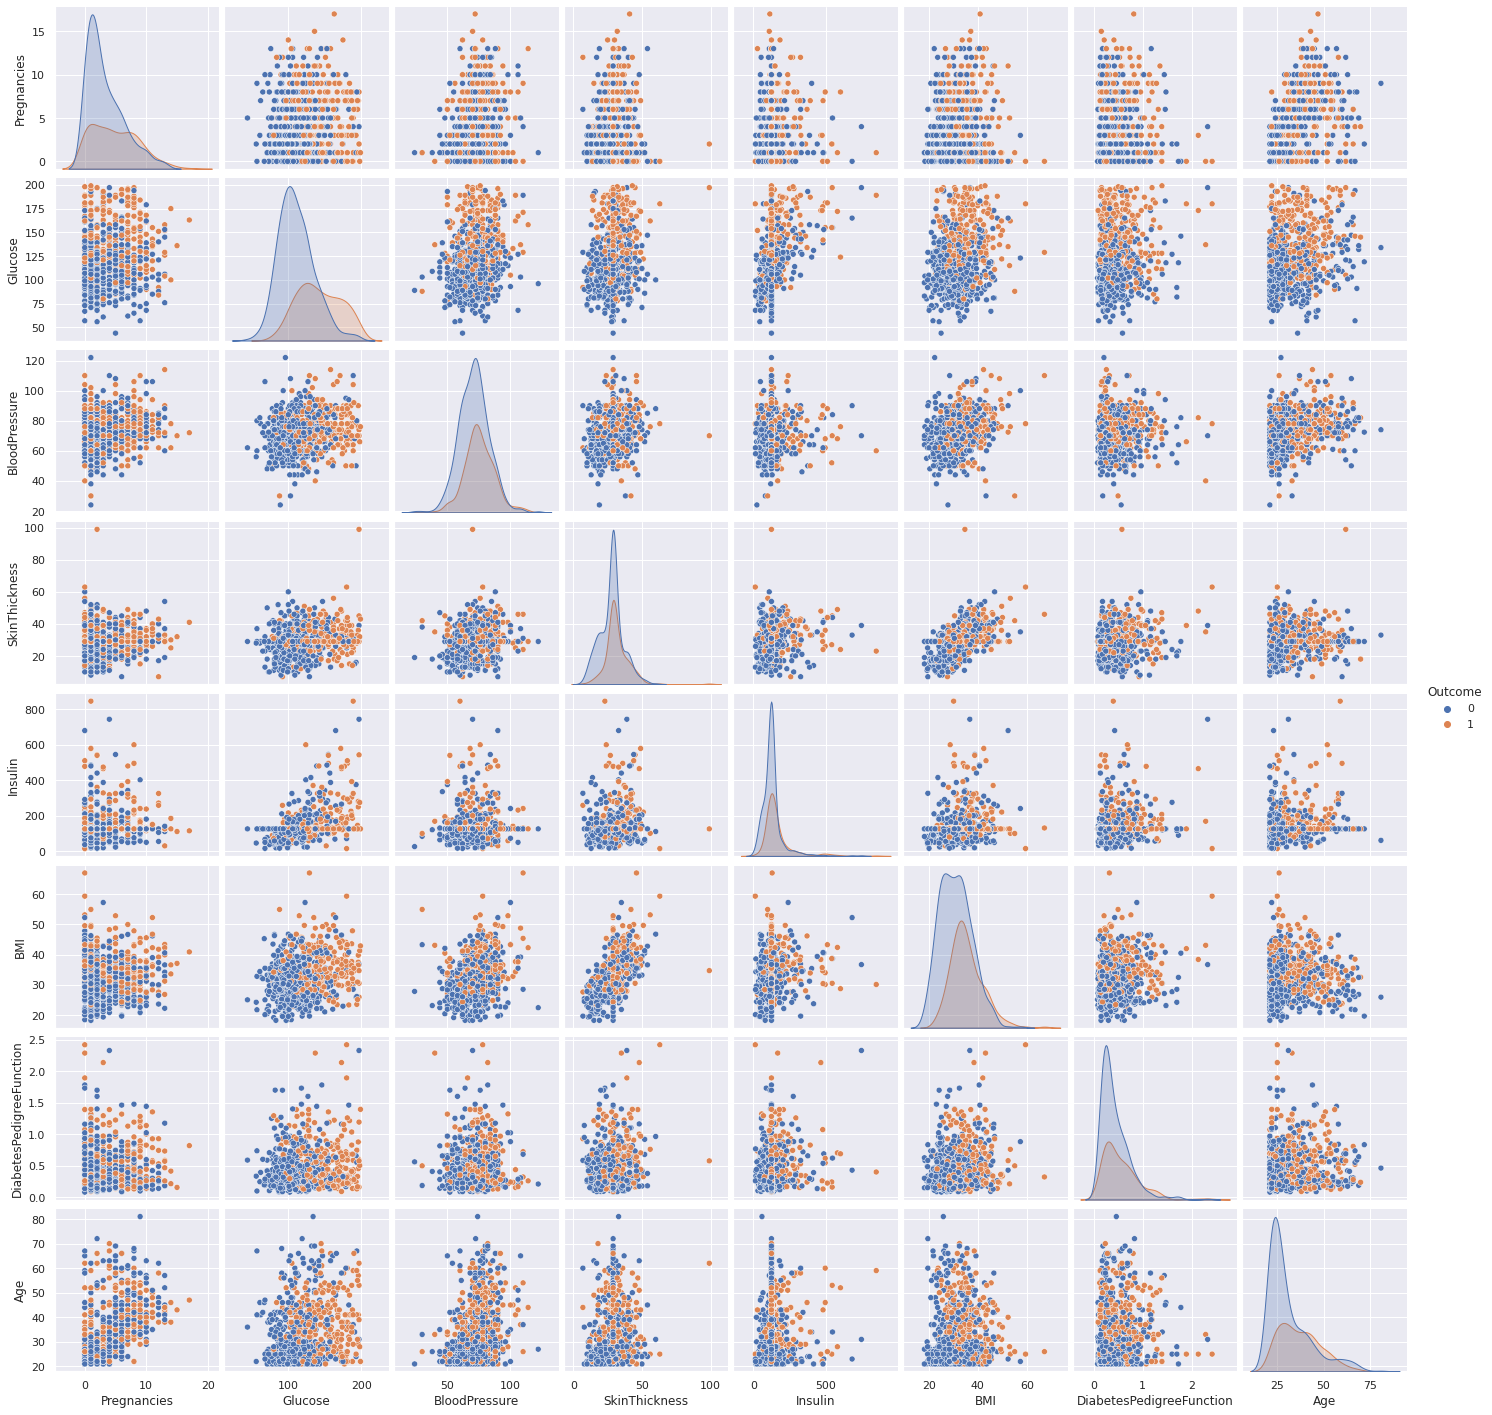

In [43]:
p = sns.pairplot(df_new, hue='Outcome')
# can be related to Pearson's correlation coefficient

<Figure size 1296x1152 with 0 Axes>

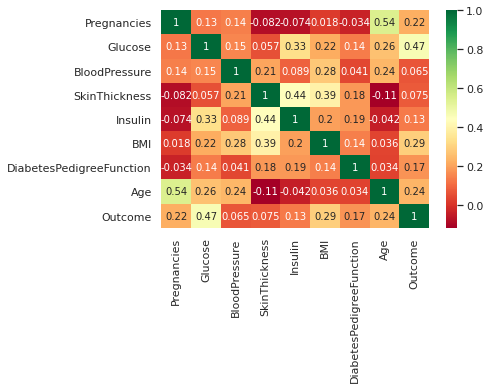

<Figure size 1296x1152 with 0 Axes>

In [44]:
# Heatmap for unclean data
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.figure(figsize=(18,16))

<Figure size 1296x1152 with 0 Axes>

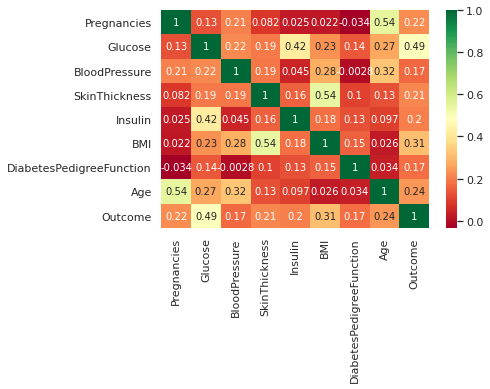

<Figure size 1296x1152 with 0 Axes>

In [45]:
# Heatmap for clean data
p = sns.heatmap(df_new.corr(), annot=True, cmap='RdYlGn')
plt.figure(figsize=(18,16))

In [46]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale and drop the target (so we get feature --> x)
X = pd.DataFrame(scaler.fit_transform(df_new.drop(["Outcome"],axis=1),), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                                                                 'Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [47]:
# All features are present
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [48]:
# Target --> 0 and 1
y = df_new.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# we will try knn range from 1-15 and check its score
test_score = []
train_score = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [51]:
max_train_score = max(train_score)
idx_train_max = max(range(len(train_score)), key=train_score.__getitem__) + 1
print('Max train score {} % and k = {}'.format(max_train_score*100, idx_train_max))

Max train score 100.0 % and k = 1


In [52]:
max_test_score = max(test_score)
idx_test_max = max(range(len(test_score)), key=test_score.__getitem__) + 1
print('Max test score {} % and k = {}'.format(max_test_score*100, idx_test_max))

Max test score 75.32467532467533 % and k = 11


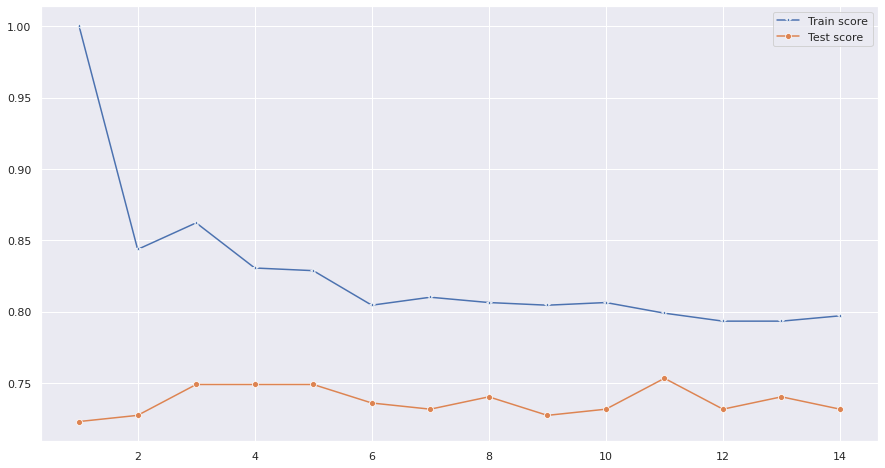

In [53]:
# Result visualization
plt.figure(figsize=(15,8))
p = sns.lineplot(range(1,15), train_score, marker='*', label='Train score')
p = sns.lineplot(range(1,15), test_score, marker='o', label='Test score')

In [54]:
# So, the best result (for test score) is k=11, so we will use it for final model
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

### Model performance analysis
* Confusion matrix
* Classification report
* ROC-AUC

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[127,  23],
       [ 34,  47]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [57]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

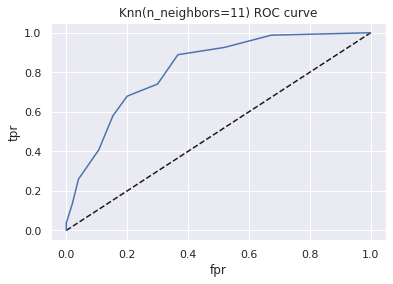

In [58]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [59]:
#Area under ROC curve (AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8161316872427984

## Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [60]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)} # try n_neighbors from 1 to 50
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5) # cross validate = 5
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7708853238265002
Best Parameters: {'n_neighbors': 28}
